Random Forest
===========

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

의사결정 트리 생성하기
-----------

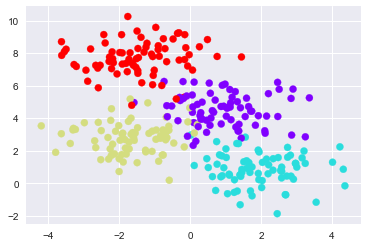

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples = 300, centers = 4, random_state = 0, cluster_std = 1.0)
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'rainbow')

In [3]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

분류기의 결과를 시각화하기
----------

In [5]:
def visualize_classifier(model, X, y, ax = None, cmap = 'rainbow'):
    ax = ax or plt.gca()
    
    # 훈련 데이터 점 플로팅
    ax.scatter(X[:, 0], X[:, 1], c = y, s = 30, cmap = cmap,
              clim = (y.min(), y.max()), zorder = 3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # 모델 적합
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num = 200), np.linspace(*ylim, num = 200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # 결과를 이용해 컬러 플롯 생성
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha = 0.3, levels = np.arange(n_classes + 1) - 0.5,
                          cmap = cmap, clim = (y.min(), y.max()), zorder = 1)
    ax.set(xlim = xlim, ylim = ylim)

C:\Users\default.DESKTOP-S5Q9GAA\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


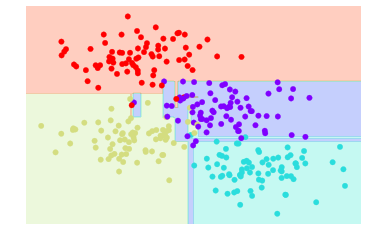

In [6]:
visualize_classifier(DecisionTreeClassifier(), X, y)

과적합은 의사결정 트리의 일반적인 특성이다. 트리에서는 너무 깊게 들어가서 데이터 분포의  
전반적인 특성보다는 특정 데이터의 세부 내역에 적합하기가 아주 쉽다.  
이러한 과적합을 확인할 수 있는 또 다른 방법은 데이터의 서로 다른 부분집합에 대해 훈련된 모델을  
살펴보는 것이다.  예를 들어 원본 데이터를 반으로 나누어 두 개의 다른 트리를 훈련시킨다.  

추정 모델의 앙상블 : 랜덤 포레스트
    ------------------

여러 과적합 추정 모델을 결합해서 이 과적합의 효과를 줄일 수 있다는 개념이  
바로 **배깅(bagging)**이라고 부르는 앙상블 기법의 기반이 된다.  
배깅은 각각이 데이터에 과적합하는 유사한 추정 모델의 앙상블을 사용하고  
그 결과를 평균 내어 더 나은 분류를 구한다. 임의화 의사결정 트리의 앙상블을  
**랜덤 포레스트(random forest)**라고 한다  
이러한 유형의 배깅 분류는 BaggingClassifier 메타 추정기를 사용해 구현할 수 있다  

C:\Users\default.DESKTOP-S5Q9GAA\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


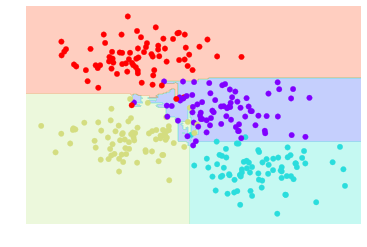

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators = 100, max_samples = 0.8, random_state = 1)
bag.fit(X, y)
visualize_classifier(bag, X, y)

이를 통해 모든 데이터가 매번 적합에 기여하지만, 적합의 결과는  
여전히 원하던 임의성을 갖게 된다. 실제로 의사결정 트리는 분할을 선택하는  
방식에 우연성이 주입될 때 더 효과적으로 임의화된다.  
이러한 임의화된 의사결정 트리의 최적화된 앙상블은 **RandomForestClassifier** 추정기에 구현되어 있다  

C:\Users\default.DESKTOP-S5Q9GAA\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


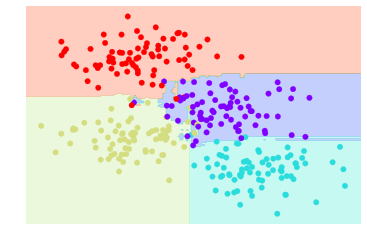

In [11]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100, random_state = 0)
visualize_classifier(model, X, y)

무작위로 교란된 100개 이상의 모델을 평균냄으로써 모수 공간이 어떻게 나뉘어야 할지에 대해  
가지고 있던 직관에 훨씬 근접한 전반적인 모델을 얻을 수 있음을 확인할 수 있다.  

랜덤 포레스트 회귀
---------

<ErrorbarContainer object of 3 artists>

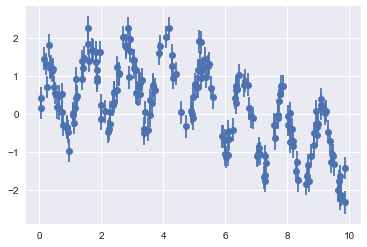

In [16]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(200)

def model(x, sigma = 0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))
    
    return slow_oscillation + fast_oscillation + noise

y = model(x)
plt.errorbar(x, y, 0.3, fmt = 'o')

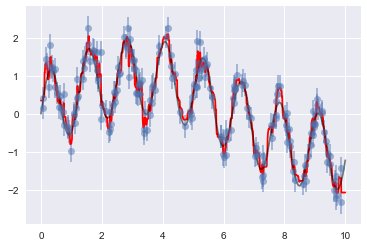

In [17]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(200)
forest.fit(x[:, None], y)

xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, None])
ytrue = model(xfit, sigma = 0)

plt.errorbar(x, y, 0.3, fmt = 'o', alpha = 0.5)
plt.plot(xfit, yfit, '-r')
plt.plot(xfit, ytrue, '-k', alpha = 0.5)

여기서 진짜 모델은 부드러운 곡선으로 표시되지만, 랜덤 포레스트 모델은 들쭉날쭉한  
곡석으로 표시된다. 보시다시피 비모수 랜덤 포레스트 모델은 다중 기간 모델을 지정하지 않고도  
다중 기간 데이터를 적합하기에 충분할 만큰 유연하다  

예제 : 랜덤 포레스트를 사용한 숫자 분류
    ----------------

In [18]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

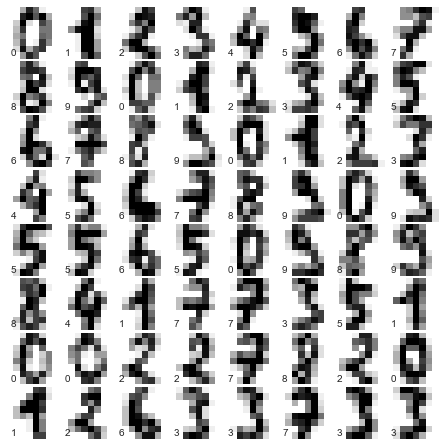

In [20]:
# 그림(figure) 설정
fig = plt.figure(figsize = (6, 6))  #그림 크기는 인치 단위
fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)

# 숫자 플로팅 : 각 이미지는 8x8 픽셀
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks = [], yticks = [])
    ax.imshow(digits.images[i], cmap = plt.cm.binary, interpolation = 'nearest')
    
    # 대상값으로 이미지에 레이블 추가
    ax.text(0, 7, str(digits.target[i]))

In [22]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,
                                               random_state = 0)

model = RandomForestClassifier(n_estimators = 1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

In [24]:
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

             precision    recall  f1-score   support

          0       1.00      0.97      0.99        38
          1       0.98      0.98      0.98        43
          2       0.95      1.00      0.98        42
          3       0.98      0.96      0.97        46
          4       0.97      1.00      0.99        37
          5       0.98      0.96      0.97        49
          6       1.00      1.00      1.00        52
          7       1.00      0.96      0.98        50
          8       0.94      0.98      0.96        46
          9       0.98      0.98      0.98        47

avg / total       0.98      0.98      0.98       450



Text(92.68,0.5,'predicted label')

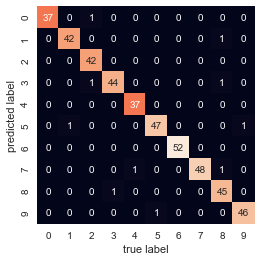

In [25]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False)
plt.xlabel('true label')
plt.ylabel('predicted label')